## Part 0. Dataset Preparation

## Importing libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import random
from random import sample
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
%matplotlib inline

## 1. Download the dataset



In [2]:
# Prepare your dataset here and display samples here.
from tensorflow.keras.datasets import cifar10
((x_train,y_train),(x_test,y_test)) = cifar10.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 90s 1us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [3]:
type(x_train)

numpy.ndarray

##2. Visualization

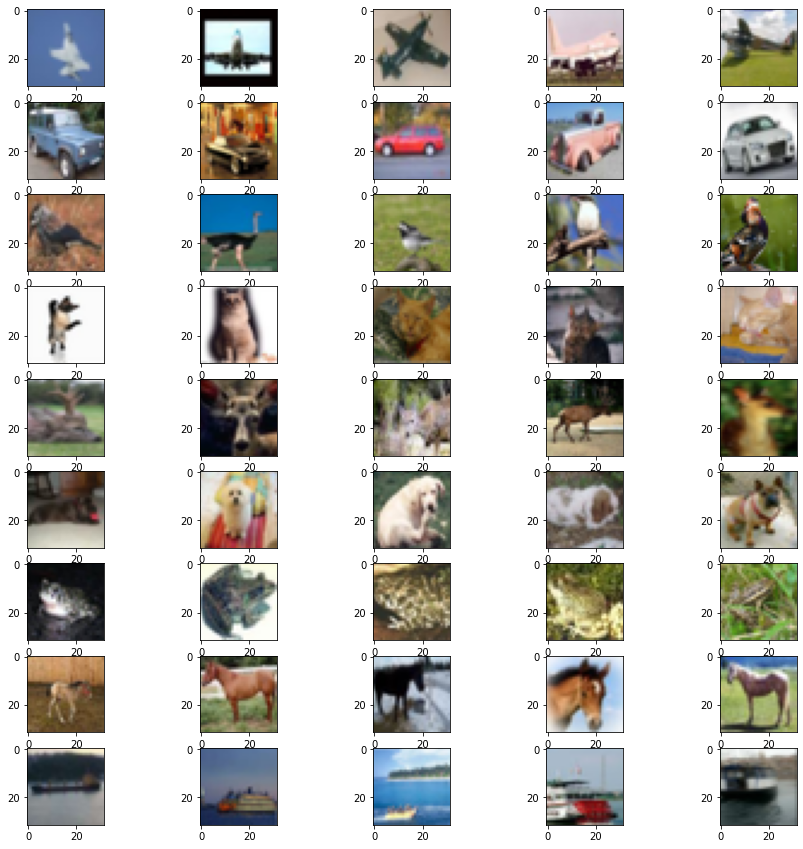

In [4]:
def dispImg(imgs,label,n_sample):
    sample_img = {}
    for i in range(10):
        idx = np.where(label == i)[0]
        img = imgs[idx]
        sample_img[i] = sample(list(img),5) 
    fig, ax = plt.subplots(9,5,figsize=(15, 15))
    for i in range (9):
        for j in range(5):
            ax[i,j].imshow(sample_img[i][j])

dispImg(x_train,y_train,5)

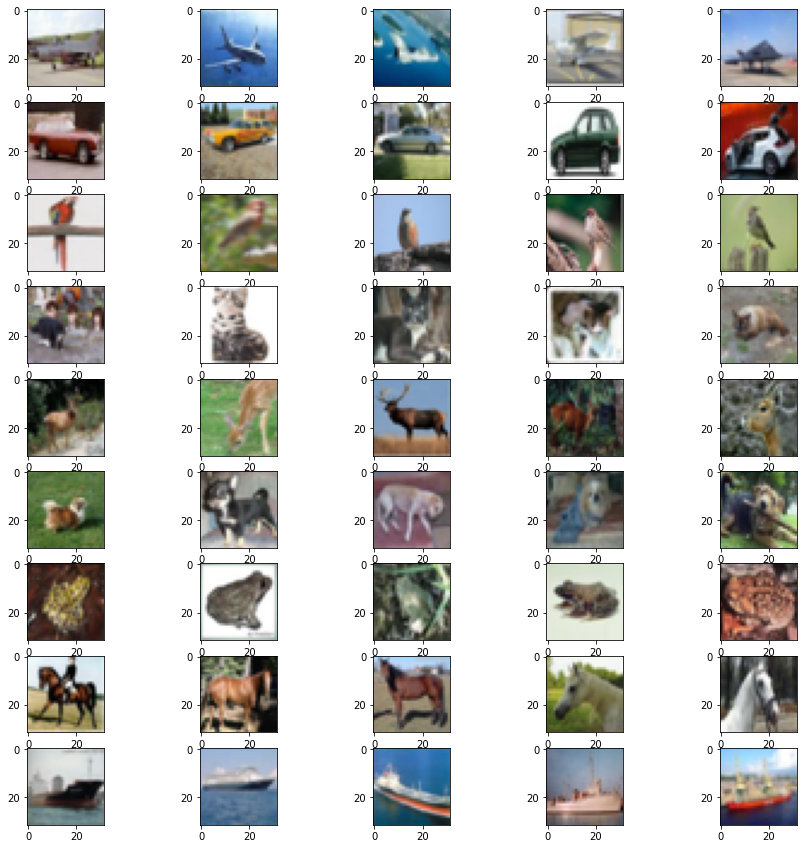

In [5]:
dispImg(x_test,y_test,5)

## Part 1. k-NN Classifier 

In [3]:
#Prepare the data
x_train = x_train.reshape(x_train.shape[0],32*32*3)
x_test = x_test.reshape(x_test.shape[0],32*32*3)
y_train = pd.DataFrame(y_train, columns = ['y_train'])
y_test = pd.DataFrame(y_test,columns = ['y_test'])

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
#Taking sample
x_train_new = x_train[:10000]
x_test_new = x_test[:3000]
y_train_new = pd.DataFrame(y_train.iloc[:10000,:].values)
y_test_new = pd.DataFrame(y_test.iloc[:3000,:].values)
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [18]:
class KNN:
    def __init__(self,k):
        self.k = k
        
    def Euclidean(self,x_train_new,x_test_new,k):
        distance = 0
        distance = np.sum(x_train_new**2,axis = 1)+np.sum(x_test_new**2,axis=1).reshape(-1,1) - 2*np.dot(x_test_new,x_train_new.T)
        distance = np.sqrt(distance)
        idx = np.argsort(distance)[:,:k]
        return idx

    def prediction (self,k,y_train_new,x_test_new,x_train_new):
        y_pred = []
        idx = self.Euclidean(x_train_new,x_test_new,k)
        for i in range(len(x_test_new)):
            dist = y_train_new.iloc[idx[i],:]
            counter = Counter(list(y_train_new.iloc[idx[i],0]))
            pred = counter.most_common()[0][0]
            y_pred.append(pred)
        return y_pred

In [19]:
acc_knn = []
for k in [3,5,7,9,11,13,15]:
    parameters = KNN(k)
    y_pred_knn = parameters.prediction(k,y_train_new,x_test_new,x_train_new)
    acc_knn.append(accuracy_score(y_test_new,y_pred_knn))

In [24]:
max_acc = np.argmax(acc_knn)
max_acc

1

              precision    recall  f1-score   support

           0       0.34      0.41      0.37       299
           1       0.63      0.13      0.21       287
           2       0.22      0.38      0.27       318
           3       0.25      0.14      0.18       295
           4       0.20      0.42      0.27       299
           5       0.33      0.19      0.24       290
           6       0.28      0.32      0.30       307
           7       0.50      0.19      0.28       286
           8       0.37      0.65      0.47       316
           9       0.67      0.13      0.22       303

    accuracy                           0.30      3000
   macro avg       0.38      0.29      0.28      3000
weighted avg       0.38      0.30      0.28      3000

0.2986666666666667


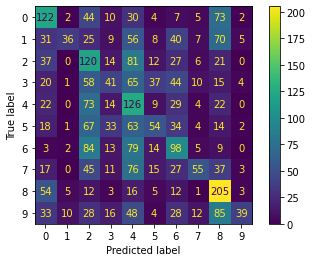

In [27]:
parameters = KNN(5)
y_pred_knn = parameters.prediction(5,y_train_new,x_test_new,x_train_new)
cm_knn = classification_report(y_test_new,y_pred_knn)
acc_knn = accuracy_score(y_test_new,y_pred_knn)
print(cm_knn)
print(acc_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_new,y_pred_knn))
disp.plot()

## Part 2. Logistic Regression

In [28]:
OVR = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
Predicted_Probability = pd.DataFrame()
Predicted = []

for i in range(10):
    for j in range(len(y_train_new)):
        if y_train_new.iloc[j,0]==i:
            OVR[i].append(1)
        else:
            OVR[i].append(0)

C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

              precision    recall  f1-score   support

           0       0.42      0.42      0.42       299
           1       0.44      0.39      0.41       287
           2       0.25      0.21      0.23       318
           3       0.23      0.20      0.22       295
           4       0.29      0.28      0.28       299
           5       0.25      0.24      0.25       290
           6       0.36      0.41      0.38       307
           7       0.38      0.40      0.39       286
           8       0.44      0.54      0.49       316
           9       0.34      0.33      0.34       303

    accuracy                           0.34      3000
   macro avg       0.34      0.34      0.34      3000
weighted avg       0.34      0.34      0.34      3000

0.3443333333333333


C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


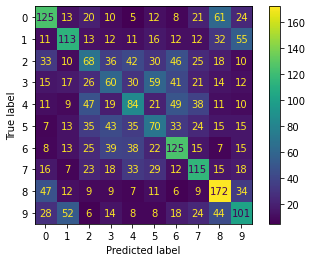

In [31]:
# Write your logistic regression code here.
for i in range(10):
    LR = LogisticRegression()
    LR.fit(x_train_new,OVR[i])
    Predicted_Probability[i] = LR.predict_proba(x_test_new)[:,1]

y_pred_lr = Predicted_Probability.to_numpy()
y_pred_lr =np.argmax(y_pred_lr, axis=1)

cr_LR = classification_report(y_test_new,y_pred_lr)
acc_LR = accuracy_score(y_test_new,y_pred_lr)
cm_LR = confusion_matrix(y_test_new,y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_LR)
print(cr_LR)
print(acc_LR)
disp.plot()

## Part 3. Support Vector Machine (SVM) Classification

C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 27   5 145   4  32   5  10   8  57   6]
 [  7  66  84   5  39   7  21   9  26  23]
 [  7   6 187   1  64   9  20   7  15   2]
 [  3  10 141   9  64  17  34   3  11   3]
 [  3   6 137   4  98  10  23  13   3   2]
 [  1   7 139   7  67  30  19   7   9   4]
 [  3  13 117  12  72  10  70   5   3   2]
 [  1   7 114   6  74  17   7  44  10   6]
 [  4   8 136   2  30   4   9   3 110  10]
 [ 10  36 102   6  45   8  13  19  33  31]]
0.224


C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


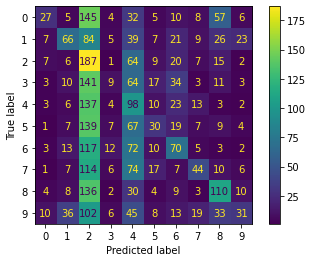

In [32]:
# Run your SVM experiments here.
SVM = LinearSVC(multi_class='ovr')
SVM.fit(x_train_new,y_train_new)
y_pred_svm= SVM.predict(x_test_new)

cr_SVM = classification_report(y_test_new,y_pred_svm)
acc_SVM = accuracy_score(y_test_new,y_pred_svm)
cm_SVM = confusion_matrix(y_test_new,y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVM)
print(cm_SVM)
print(acc_SVM)
disp.plot()


C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Text(0.5, 1.0, 'An accuracy vs. C-parameter')

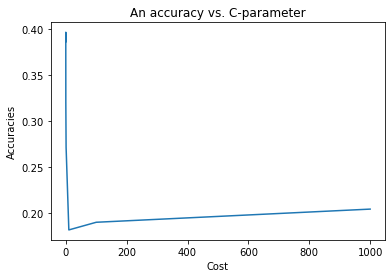

In [33]:
acc_c = []
for i in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]:
    SVM_C = LinearSVC(multi_class='ovr', C=i)
    SVM_C.fit(x_train_new,y_train_new)
    y_pred_svm_C= SVM_C.predict(x_test_new)
    acc_c.append(accuracy_score(y_test_new,y_pred_svm_C))
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ], acc_c)
plt.xlabel('Cost')
plt.ylabel('Accuracies')
plt.title('An accuracy vs. C-parameter')

In [34]:
acc_c

[0.38666666666666666,
 0.397,
 0.367,
 0.32,
 0.27166666666666667,
 0.18166666666666667,
 0.19,
 0.20433333333333334]

C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Us

Text(0.5, 1.0, 'An accuracy vs. C-parameter')

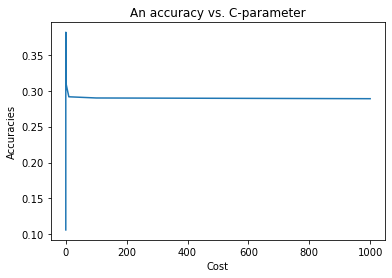

In [35]:
acc_c_l = []
for i in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]:
    SVM_C_L = LinearSVC(multi_class='ovr', C=i, penalty='l1', loss='squared_hinge', dual=False)
    SVM_C_L.fit(x_train_new,y_train_new)
    y_pred_svm_C_L= SVM_C_L.predict(x_test_new)
    acc_c_l.append(accuracy_score(y_test_new,y_pred_svm_C_L))
plt.plot([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ],  acc_c_l)
plt.xlabel('Cost')
plt.ylabel('Accuracies')
plt.title('An accuracy vs. C-parameter')

In [36]:
acc_c_l

[0.106,
 0.16733333333333333,
 0.341,
 0.38166666666666665,
 0.30966666666666665,
 0.2916666666666667,
 0.29,
 0.289]

In [ ]:
acc_cg_l = {0.0001:[],0.001:[],0.01:[],0.1:[],1:[],10:[],100:[],1000:[]}
for c in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]:
    for g in [0.01, 0.1, 1, 10, 100]:
        SVM_C_L = SVC(C=c, gamma=g, decision_function_shape='ovr', random_state = 0)
        SVM_C_L.fit(x_train_new,y_train_new)
        y_pred_svm_C_L= SVM_C_L.predict(x_test_new)
        acc_cg_l[c].append(accuracy_score(y_test_new,y_pred_svm_C_L))
# plt.plot( [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ],  acc_cg_l)
# plt.xlabel('Cost')
# plt.ylabel('Accuracies')
# plt.title('An accuracy vs. C-parameter')

C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [29]:
acc_cg_l[0:8]

[0.106, 0.106, 0.106, 0.106, 0.106, 0.106, 0.106, 0.106]

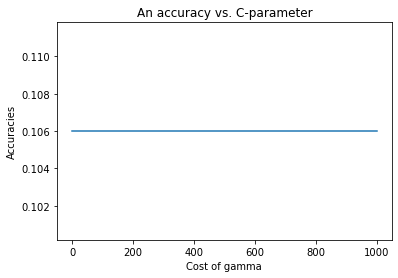

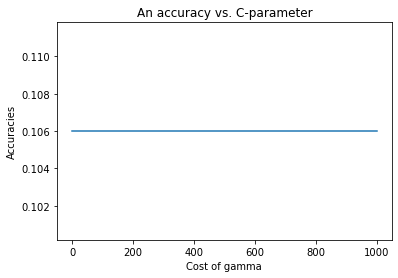

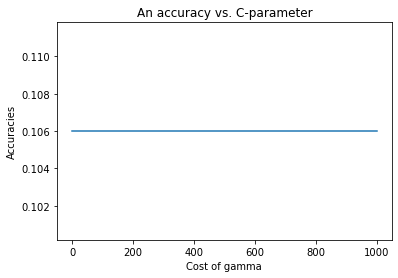

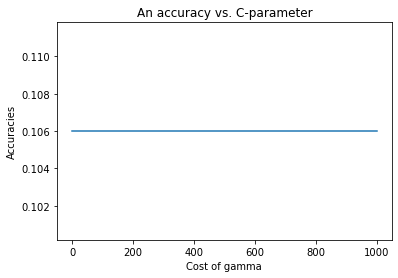

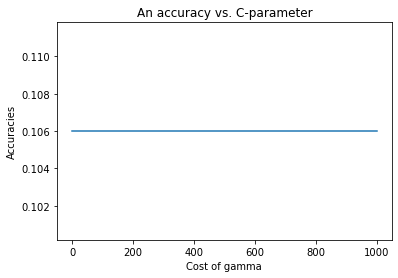

In [42]:
g =  [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
for i in range(0,5):
    plt.plot( [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ],  acc_cg_l[i:i+8])
    plt.xlabel('Cost of gamma')
    plt.ylabel('Accuracies')
    plt.title('An accuracy vs. C-parameter')
    plt.show()

C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[41  5  5  1  0  2  7  2 24 16]
 [ 3 39  1  1  2  8  3  2  9 21]
 [21  1 22  5  4 10 14  3 18  2]
 [ 6  7 11  9  3 26 16  7 11  7]
 [12  3 15  3 12  7 23  4  7  4]
 [ 9  3 13  4  4 28 14  3  4  4]
 [ 6  4  4  6  3  9 67  4  6  3]
 [ 7  3 10  6 12  9 10 29  7  9]
 [15  4  2  2  0  4  1  0 66 12]
 [ 8 12  1  1  1  2  4  4 21 55]]
0.368


C:\Users\EGYPT_LAPTOP\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


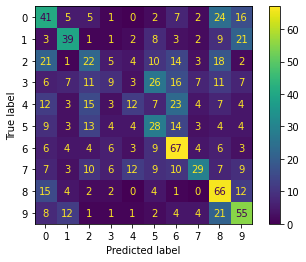

In [15]:
SVM_C_L = LinearSVC(multi_class='ovr', C=0.0001, penalty='l1', loss='squared_hinge', dual=False)
SVM_C_L.fit(x_train_new,y_train_new)
y_pred_svm_C_L= SVM_C_L.predict(x_test_new)
cr_SVM_C = classification_report(y_test_new,y_pred_svm_C_L)
acc_SVM_C = accuracy_score(y_test_new,y_pred_svm_C_L)
cm_SVM_C = confusion_matrix(y_test_new,y_pred_svm_C_L)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVM_C, display_labels=SVM_C_L.classes_)
print(cm_SVM_C)
print(acc_SVM_C)
disp.plot()

<!-- Write your conclusion here -->